<a href="https://colab.research.google.com/github/baselnabil/ETL_GRAD_Project/blob/main/Data_Engineers_Salaries_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV  # Added GridSearchCV for hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample  # Added for handling class imbalance
from sklearn.model_selection import cross_val_score  # Added for cross-validation

In [338]:
data = pd.read_csv('salaries (2).csv')

#**Data Exploration**


In [339]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [340]:
data.shape

(16534, 11)

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [342]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [343]:
data.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


#analysis

In [344]:
missing_values = data.isnull().sum()

missing_percentage = (missing_values / len(data)) * 100

missing_data_df = pd.DataFrame({'Feature': data.columns, 'Missing Values (%)': missing_percentage})

missing_data_df = missing_data_df[missing_data_df['Missing Values (%)'] > 0]

missing_data_df = missing_data_df.sort_values(by='Missing Values (%)', ascending=False)

In [345]:
print(missing_data_df)

Empty DataFrame
Columns: [Feature, Missing Values (%)]
Index: []


#Distribution of target variable

In [346]:
print(data['experience_level'].value_counts())


experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64


<Axes: xlabel='experience_level'>

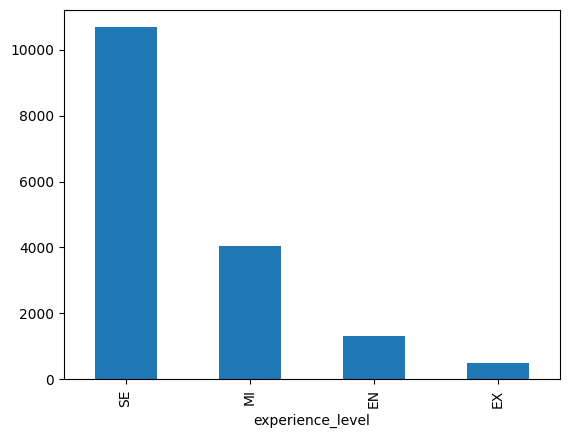

In [347]:
data['experience_level'].value_counts().plot(kind='bar')


#experiance_level imbalanced class

In [348]:
from sklearn.utils import resample

majority_class = data[data['experience_level'] == 'SE']
minority_class = data[data['experience_level'] != 'SE']
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

data = pd.concat([majority_class, minority_upsampled])

print(data['experience_level'].value_counts())


experience_level
SE    10670
MI     7324
EN     2461
EX      885
Name: count, dtype: int64


<Axes: xlabel='experience_level'>

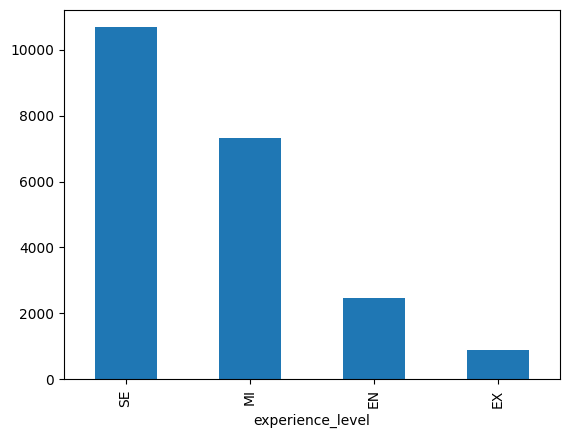

In [349]:
data['experience_level'].value_counts().plot(kind='bar')


#Separate features (X) and target (y)

In [350]:
X = data.drop('experience_level', axis=1)
y = data['experience_level']

#Encoding Categorical Variables


In [351]:
X = pd.get_dummies(X, drop_first=True)


In [352]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [367]:
print(X.shape,X_train.shape,X_test.shape)

(21340, 341) (17072, 341) (4268, 341)


In [353]:
# initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [354]:
#  Optimize the Model Using Hyperparameter Tuning
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)

# Apply cross-validation on the best model found
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Scores: [0.7636896  0.75139092 0.76801406 0.77475103 0.77738723]
Average Cross-Validation Score: 0.7670465682175112


RandomForestClassifier(n_estimators=200, random_state=42)

#Evaluate the model

In [355]:
y_pred = best_rf_model.predict(X_test)


In [356]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [357]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          EN       0.74      0.81      0.78       464
          EX       0.81      0.68      0.74       195
          MI       0.74      0.79      0.76      1475
          SE       0.85      0.80      0.82      2134

    accuracy                           0.79      4268
   macro avg       0.78      0.77      0.78      4268
weighted avg       0.80      0.79      0.79      4268



#Feature importance

In [358]:
# Feature importance (which features the model finds most important)
importances = best_rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                                     Feature  Importance
2                              salary_in_usd    0.308385
1                                     salary    0.304783
0                                  work_year    0.060801
3                               remote_ratio    0.028361
51                    job_title_Data Analyst    0.018753
..                                       ...         ...
143       job_title_Principal Data Architect    0.000000
193                    employee_residence_CF    0.000000
18   job_title_Analytics Engineering Manager    0.000000
94          job_title_Data Science Tech Lead    0.000000
171                      salary_currency_MXN    0.000000

[341 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

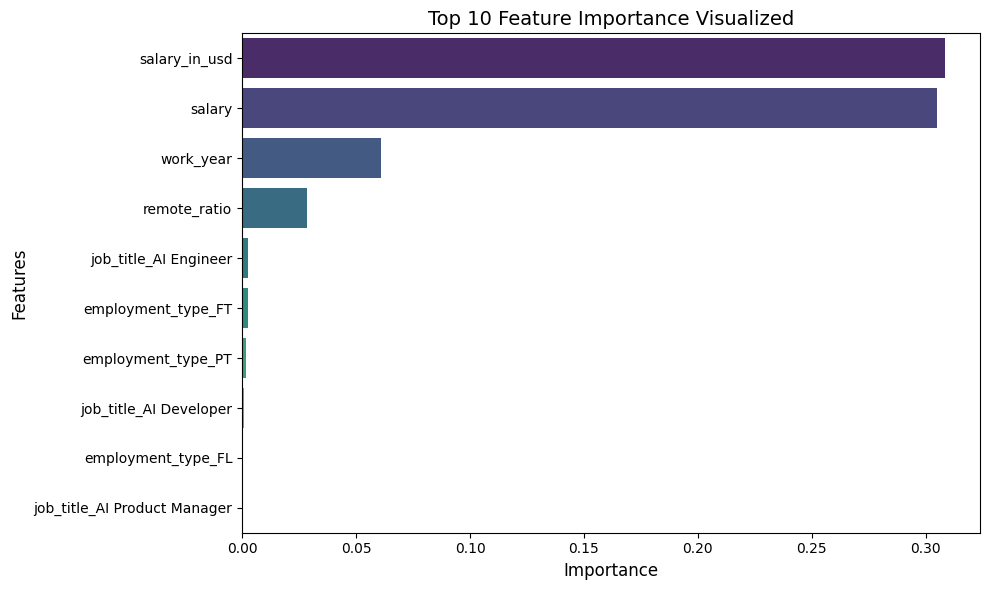

In [359]:
# Focus only on the top important features
top_features = feature_importance_df.head(10)
top_features = top_features.sort_values(by='Importance', ascending=False)

# Plotting the top feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, hue='Feature', palette='viridis', legend=False)
plt.title('Top 10 Feature Importance Visualized', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()

plt.show()




#Process New Data (DataEngineer.csv)

In [360]:
t2_df = pd.read_csv('DataEngineer.csv')
t2New_df = pd.DataFrame()

In [361]:
# Function to Extract Salary
def extract_salary(salary_str):
    match = re.search(r'\$(\d+)K-\$(\d+)K', salary_str)
    if match:
        lower = int(match.group(1)) * 1000
        upper = int(match.group(2)) * 1000
        return int((lower + upper) / 2)
    return None

In [362]:
# Function to Extract Work Year Ratio
def extract_work_year_ratio(df):
    year_counts = df['work_year'].value_counts(normalize=True)
    return year_counts


# Generate Work Years Based on Year Ratio
def generate_work_years(n, year_ratio):
    years = np.random.choice(year_ratio.index, size=n, p=year_ratio.values)
    return years

In [363]:
year_ratio = extract_work_year_ratio(data)
#  Map Company Size
def map_company_size(size_str):
    if '1 to 50 employees' in size_str or '51 to 200 employees' in size_str:
        return 'S'
    elif '201 to 500 employees' in size_str or '501 to 1000 employees' in size_str:
        return 'M'
    elif '1001 to 5000 employees' in size_str or '5001 to 10000 employees' in size_str or '10000+ employees' in size_str:
        return 'L'
    return 'NA'

In [364]:
# Process new data
t2New_df_dict = {
    'work_year': generate_work_years(len(t2_df), year_ratio),
    'employment_type': 'FT',  # placeholder. Full Time
    'job_title': t2_df['Job Title'],
    'salary': t2_df['Salary Estimate'].apply(extract_salary),
    'salary_currency': 'USD',
    'salary_in_usd': t2_df['Salary Estimate'].apply(extract_salary),
    'employee_residence': t2_df['Location'],
    'remote_ratio': 0,
    'company_location': t2_df['Location'],
    'company_size': t2_df['Size'].apply(map_company_size)
}

t2New_df = pd.DataFrame(t2New_df_dict)
t2New_df_processed = pd.get_dummies(t2New_df, drop_first=True)

In [384]:
# Ensure the columns match between the data and t2New_df
missing_cols = set(X.columns) - set(t2New_df_processed.columns)
# for col in missing_cols:
#     t2New_df_processed[col] = 0
# t2New_df_processed = t2New_df_processed[X.columns]

In [385]:
# Convert missing_cols from a set to a list
missing_cols = list(missing_cols)

# Create a DataFrame with all zeros for the missing columns
missing_df = pd.DataFrame(0, index=t2New_df_processed.index, columns=missing_cols)

# Concatenate the new columns with the existing DataFrame
t2New_df_processed = pd.concat([t2New_df_processed, missing_df], axis=1)

# Reorder columns to match the original DataFrame X
t2New_df_processed = t2New_df_processed[X.columns]



In [371]:
# Predict Experience Levels
t2New_df['experience_level'] = best_rf_model.predict(t2New_df_processed)


In [372]:
# Retrain the model on the combined dataset
rf_model.fit(t2New_df_processed, t2New_df['experience_level'])

RandomForestClassifier(random_state=42)

In [373]:
# Evaluate the model again
y_pred_retrained = best_rf_model.predict(X_test)
retrained_accuracy = accuracy_score(y_test, y_pred_retrained)
print(f'Retrained accuracy: {retrained_accuracy:.2f}')
print(classification_report(y_test, y_pred_retrained))

Retrained accuracy: 0.79
              precision    recall  f1-score   support

          EN       0.74      0.81      0.78       464
          EX       0.81      0.68      0.74       195
          MI       0.74      0.79      0.76      1475
          SE       0.85      0.80      0.82      2134

    accuracy                           0.79      4268
   macro avg       0.78      0.77      0.78      4268
weighted avg       0.80      0.79      0.79      4268



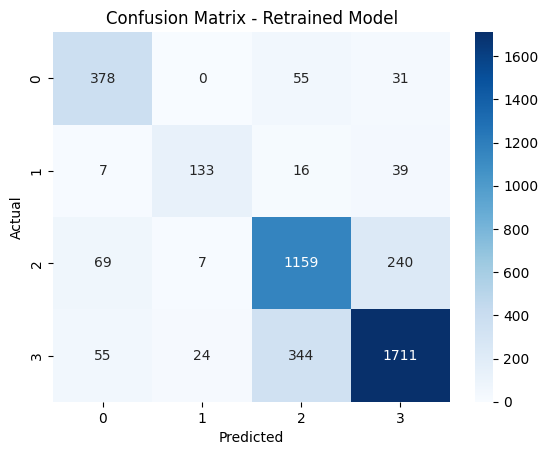

In [387]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_retrained)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Retrained Model')
plt.show()
